### import tensorflow, keras and numpy

In [4]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np

### mark our tf version and python version  

In [5]:
print(tf.__version__)

1.12.0


In [6]:
import sys
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


### download IMDB data set 

In [17]:
# we only kept the 10000 most frequent words
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [18]:
# Let's see how many entries we have in the training set
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [9]:
# The word in the comments are transfered to integers, as shown in the first comment
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [19]:
# The words in different comments are not same, as shown below, first comment has 218 words and second comment has 189 words, 
# we will add padding in the end later 
len(train_data[0]), len(train_data[1])

(218, 189)

### decode: change the integer back to word if you want to see the "real" comment

In [11]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

In [12]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

# reverse the key-value using regular expression
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# we use this function to join the words sequence with space
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [13]:
# now we can see the content in the first comment
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### Preprocessing Data 

There are two ways to treat with the input data. We chose to add padding (which has the index of 0) to the end to make the all the commnet has length 256

In [20]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

Now let's check if the first two comments has length 256

In [21]:
len(train_data[0]), len(train_data[1])

(256, 256)

We can see the paddings with value 0 in the end

In [22]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### Build the model 

In [33]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Build the test set 

In [35]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### Training 

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 92us/step - loss: 0.6918 - acc: 0.5499 - val_loss: 0.6901 - val_acc: 0.5650
Epoch 2/40
15000/15000 [==============================] - 1s 73us/step - loss: 0.6865 - acc: 0.6057 - val_loss: 0.6831 - val_acc: 0.5929
Epoch 3/40
15000/15000 [==============================] - 1s 75us/step - loss: 0.6749 - acc: 0.6897 - val_loss: 0.6687 - val_acc: 0.7336
Epoch 4/40
15000/15000 [==============================] - 1s 75us/step - loss: 0.6549 - acc: 0.7510 - val_loss: 0.6461 - val_acc: 0.7571
Epoch 5/40
15000/15000 [==============================] - 1s 73us/step - loss: 0.6255 - acc: 0.7800 - val_loss: 0.6155 - val_acc: 0.7788
Epoch 6/40
15000/15000 [==============================] - 1s 74us/step - loss: 0.5883 - acc: 0.8023 - val_loss: 0.5792 - val_acc: 0.7969
Epoch 7/40
15000/15000 [==============================] - 1s 83us/step - loss: 0.5464 - acc: 0.8239 - val_loss: 0.5403 - val_acc

### Evaluation

In [37]:
# the results shows two numbers: the loss (the smaller the better) and accuracy (the higher the better)
results = model.evaluate(test_data, test_labels)

print(results) 

25000/25000 [==============================] - 1s 27us/step
[0.32192854139328003, 0.87272]


In [38]:
# if we want to see the tendency of loss and accuracy through epoches, we can get the information from history object from model.fit()
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

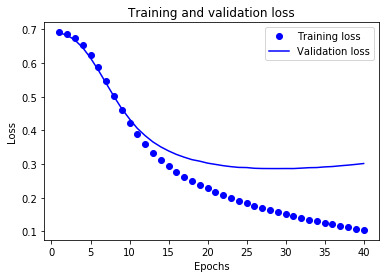

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

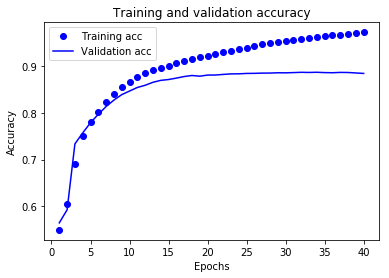

In [40]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Now we see the validation acc converges after 20 epochs while training acc still going up, this is a typical overfitting. We will deal with overfitting in the following trials 